In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# loading Image

In [3]:
image = io.imread("ex_image.jpg")
image = np.array(image)/255#Normalizing the image

In [4]:
height , width , rgb = image.shape

In [5]:
X = image.reshape((height*width,rgb))

# Training the model

In [7]:

captured_labels = np.zeros((60,X.shape[0]))
captured_loss = np.zeros(60)
for i in range(60):
   kmeans = KMeans(n_clusters = 16)
   kmeans.fit(X)
   labels = kmeans.labels_
   loss = kmeans.inertia_
   captured_loss[i]=loss
   captured_labels[i]=labels
   print(f"Iteration {i} loss: {loss}")

Iteration 0 loss: 2120.3064407237675
Iteration 1 loss: 2050.1652315991855
Iteration 2 loss: 2085.61753455566
Iteration 3 loss: 2075.8654039911344
Iteration 4 loss: 2096.8597003075133
Iteration 5 loss: 2151.3801677277734
Iteration 6 loss: 2113.139167804886
Iteration 7 loss: 2050.0475247256327
Iteration 8 loss: 2117.6422930255594
Iteration 9 loss: 2098.5488117222626
Iteration 10 loss: 2084.802814341868
Iteration 11 loss: 2050.534220616927
Iteration 12 loss: 2075.806023254432
Iteration 13 loss: 2084.7309686286326
Iteration 14 loss: 2119.2623456578435
Iteration 15 loss: 2104.4852466947887
Iteration 16 loss: 2050.4024888532745
Iteration 17 loss: 2082.876947091642
Iteration 18 loss: 2096.9806548444258
Iteration 19 loss: 2150.3796648871808
Iteration 20 loss: 2051.7247586947683
Iteration 21 loss: 2051.8489975565626
Iteration 22 loss: 2117.5641235643443
Iteration 23 loss: 2050.0271095645317
Iteration 24 loss: 2083.0034078156527
Iteration 25 loss: 2075.905517599703
Iteration 26 loss: 2135.958734

In [8]:
minimum_loss_index = np.argmin(captured_loss)
label = captured_labels[minimum_loss_index].astype(int)


In [9]:
print(label)

[0 0 0 ... 1 1 1]


In [10]:
compressed_image = np.zeros_like(X)

for i in range(X.shape[0]):
    compressed_image[i]=kmeans.cluster_centers_[label[i]]  #Assigning cluster centroids to each pixel in the image

In [11]:
compressed_image = compressed_image.reshape((height, width,rgb))

In [12]:
print(compressed_image.shape)

(800, 800, 3)


# Image Output

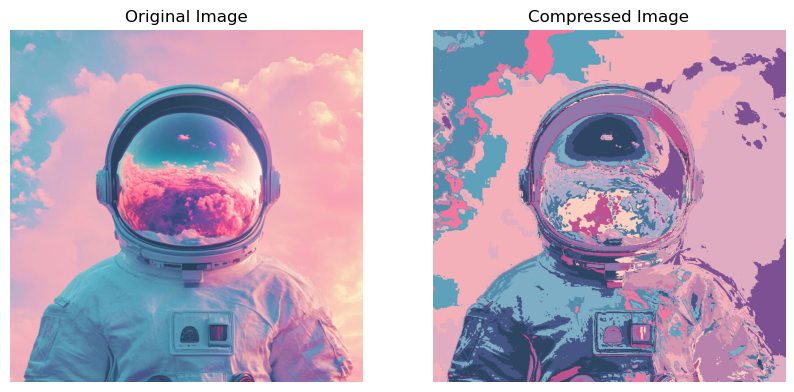

In [14]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(image)

plt.subplot(1,2,2)
plt.title("Compressed Image")
plt.imshow(compressed_image)
plt.axis("off")
plt.show()